In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

In [50]:
all_features = pd.read_csv("./all_features.csv")
all_features["Date"] = pd.to_datetime(all_features["Date"])
all_features.set_index("Date",inplace=True)
all_features.head()

,Open,High,Low,Close,Adj Close,Volume,Target,3_adx,3_pos_di,3_neg_di,...,8_wma,14_sma,14_ema,14_wma,21_sma,21_ema,21_wma,26_sma,26_ema,26_wma
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-02,0.263345,0.263830,0.255380,0.258188,0.258188,3635780000,0,0.0,0.00000,0.000000,...,0.0,0.258188,0.258188,0.0,0.258188,0.258188,0.0,0.258188,0.258188,0.0
2018-04-03,0.259217,0.261914,0.257549,0.261445,0.261445,3395840000,0,0.0,0.00000,0.000000,...,0.0,0.259816,0.258622,0.0,0.259816,0.258484,0.0,0.259816,0.258429,0.0
2018-04-04,0.258404,0.264986,0.257361,0.264469,0.264469,3369230000,0,0.0,0.00000,0.000000,...,0.0,0.261367,0.259402,0.0,0.261367,0.259028,0.0,0.261367,0.258877,0.0
2018-04-05,0.265736,0.267208,0.264958,0.266284,0.266284,3230430000,0,0.0,0.00000,0.000000,...,0.0,0.262596,0.260319,0.0,0.262596,0.259688,0.0,0.262596,0.259425,0.0
2018-04-06,0.264582,0.265688,0.258627,0.260447,0.260447,3312390000,0,0.0,20.19493,36.226134,...,0.0,0.262167,0.260336,0.0,0.262167,0.259757,0.0,0.262167,0.259501,0.0


In [51]:
all_features.shape

(1509, 58)

In [22]:
all_features.corr(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume,Target,3_adx,3_pos_di,3_neg_di,...,8_wma,14_sma,14_ema,14_wma,21_sma,21_ema,21_wma,26_sma,26_ema,26_wma
Open,1.000000,0.999414,0.999154,0.998438,0.998438,-0.099764,-0.080575,0.029315,0.051347,-0.046035,...,0.950860,0.992314,0.994650,0.917671,0.987052,0.991121,0.886743,0.983298,0.988691,0.868728
High,0.999414,1.000000,0.998877,0.999167,0.999167,-0.089961,-0.075104,0.029846,0.053905,-0.048692,...,0.951344,0.993004,0.995339,0.918907,0.988374,0.992290,0.888611,0.985003,0.990155,0.870911
Low,0.999154,0.998877,1.000000,0.999265,0.999265,-0.117021,-0.086849,0.026773,0.070797,-0.068039,...,0.949128,0.989795,0.992430,0.915045,0.983865,0.988320,0.883270,0.979736,0.985581,0.864929
Close,0.998438,0.999167,0.999265,1.000000,1.000000,-0.104592,-0.080389,0.028005,0.068535,-0.064949,...,0.949747,0.990793,0.993370,0.916461,0.985538,0.989781,0.885343,0.981819,0.987352,0.867298
Adj Close,0.998438,0.999167,0.999265,1.000000,1.000000,-0.104592,-0.080389,0.028005,0.068535,-0.064949,...,0.949747,0.990793,0.993370,0.916461,0.985538,0.989781,0.885343,0.981819,0.987352,0.867298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21_ema,0.991121,0.992290,0.988320,0.989781,0.989781,-0.061218,-0.059685,0.031019,-0.027734,0.025567,...,0.948263,0.998918,0.999282,0.920026,0.999211,1.000000,0.893388,0.998338,0.999743,0.877489
21_wma,0.886743,0.888611,0.883270,0.885343,0.885343,-0.001225,-0.000861,0.057113,-0.011249,0.071733,...,0.927319,0.893315,0.893452,0.961473,0.892328,0.893388,1.000000,0.890511,0.892687,0.974579
26_sma,0.983298,0.985003,0.979736,0.981819,0.981819,-0.047212,-0.051296,0.029205,-0.047456,0.040793,...,0.941848,0.995855,0.995791,0.915228,0.999277,0.998338,0.890511,1.000000,0.998974,0.875858
26_ema,0.988691,0.990155,0.985581,0.987352,0.987352,-0.054076,-0.054488,0.031210,-0.033673,0.029774,...,0.946293,0.997783,0.998197,0.918615,0.999124,0.999743,0.892687,0.998974,1.000000,0.877282


<Axes: >

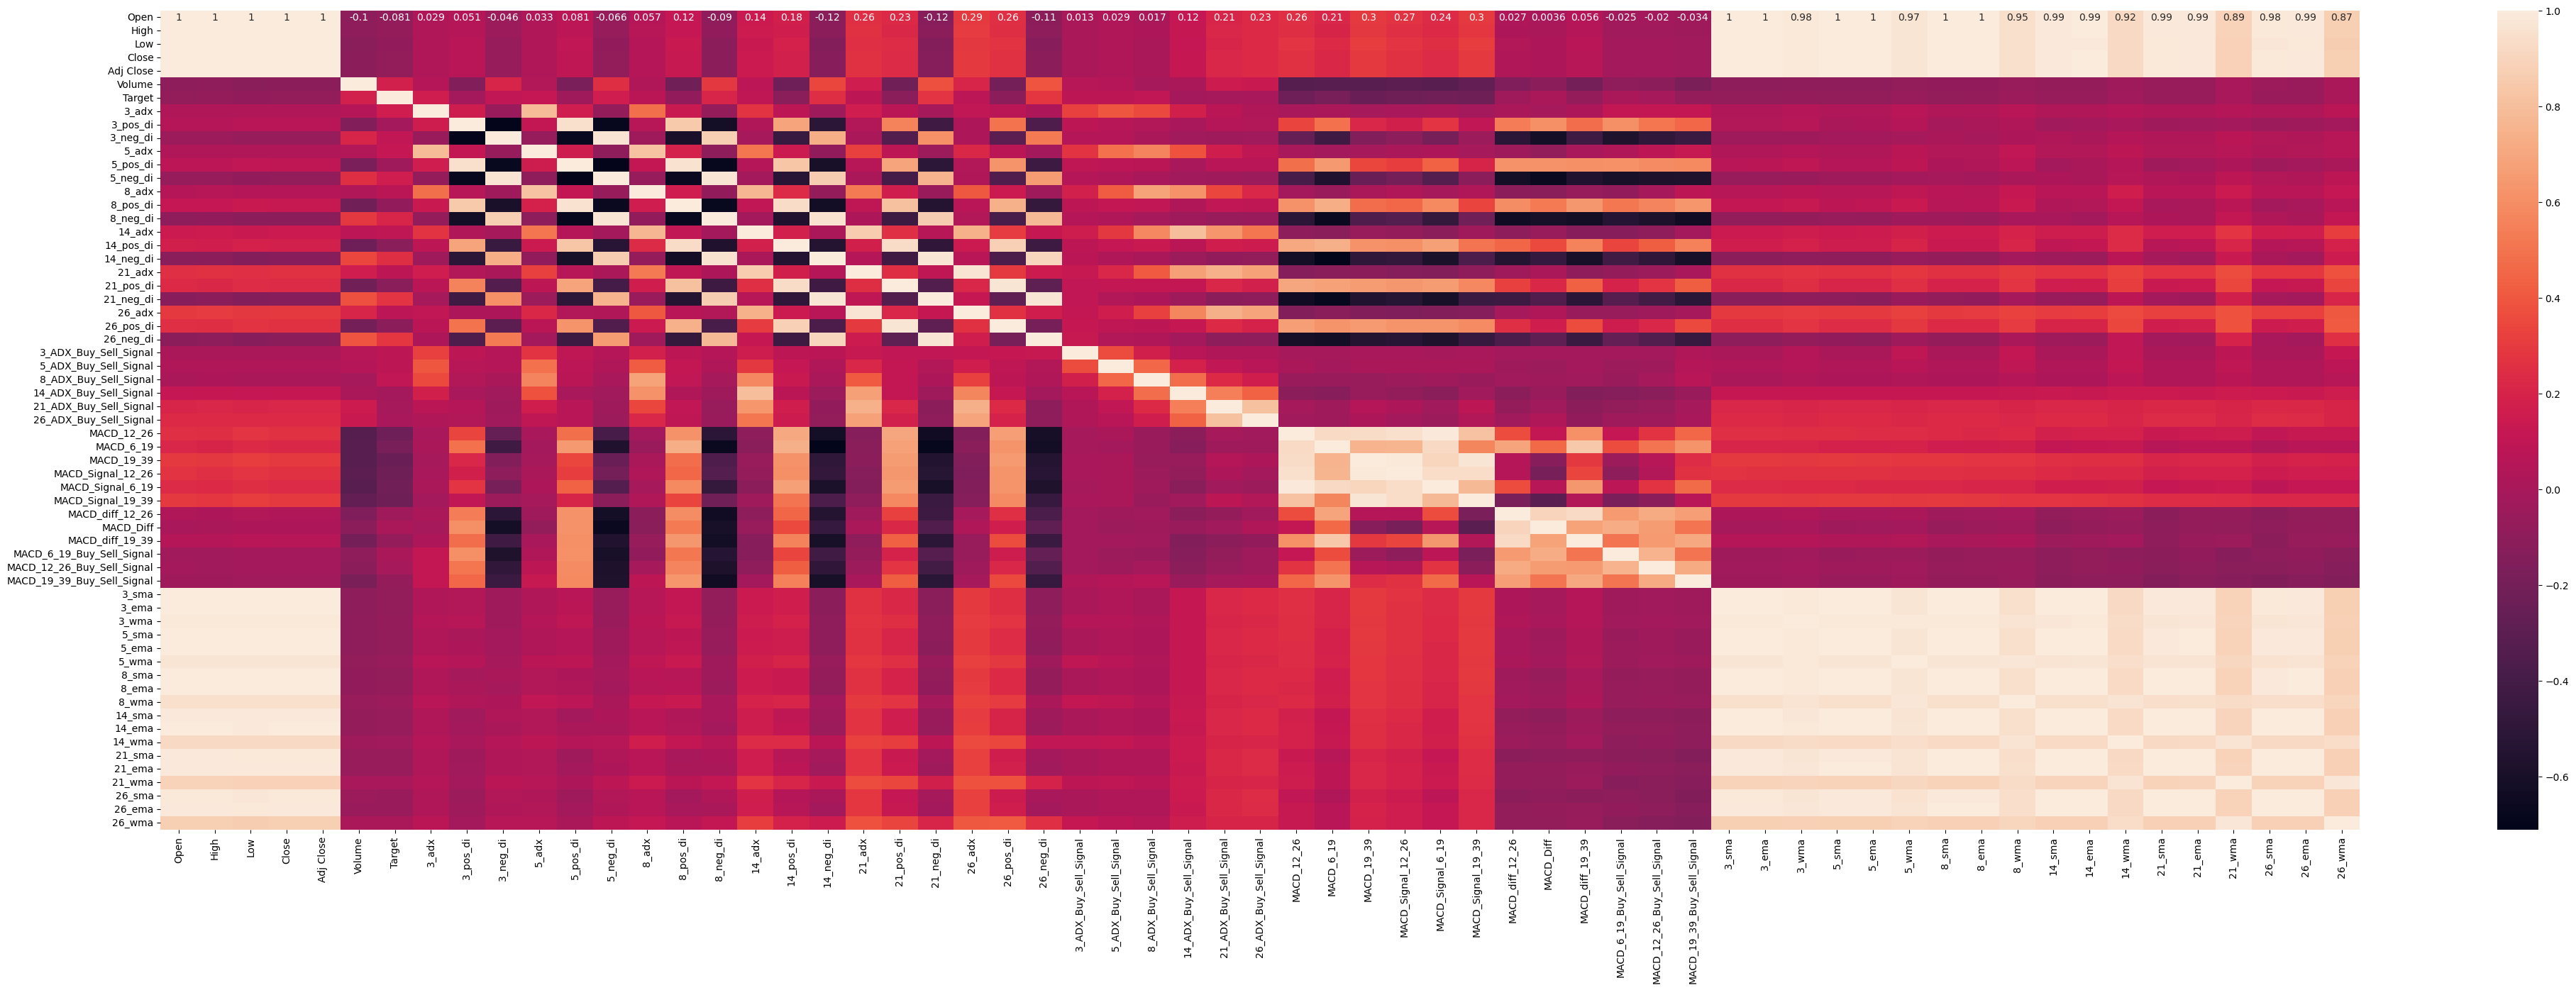

In [26]:
# All features correlation
corr = all_features.corr()
plt.figure(figsize=(50,15))
sns.heatmap(corr,annot=True)

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

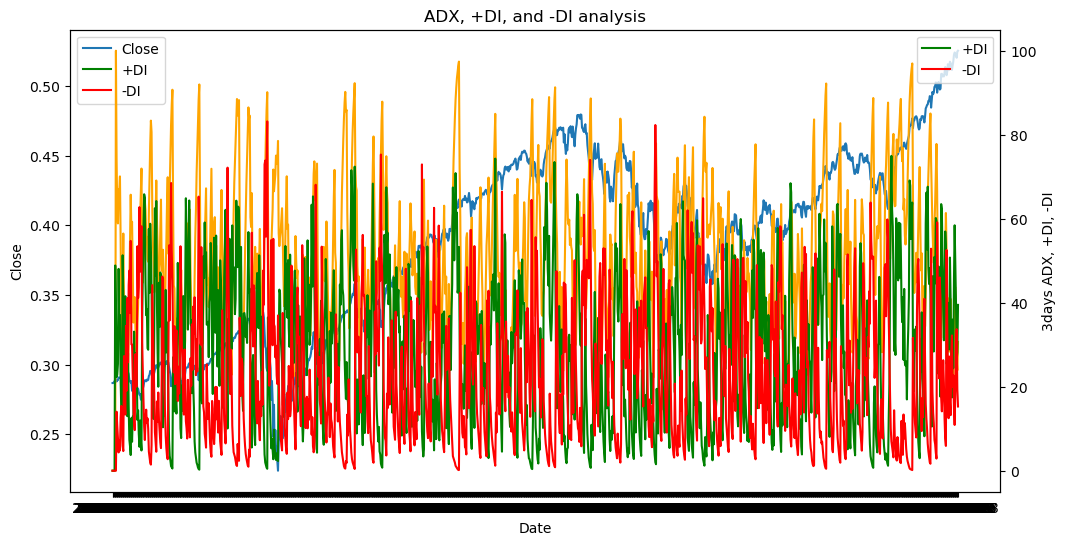

In [8]:
fig,ax = plt.subplots(figsize=(12,6))
sns.lineplot(x="Date",y="Close",label="Close",ax=ax,data=all_features)

ax2 = ax.twinx()
sns.lineplot(x="Date",y="3_adx",data=all_features,color="orange",ax=ax2)
sns.lineplot(x="Date",y="3_pos_di",data=all_features,label="+DI",color="g",ax=ax2)
sns.lineplot(x="Date",y="3_neg_di",data=all_features,label="-DI",color="r",ax=ax2)

# Add labels
ax.set_xlabel("Date")
ax.set_ylabel("Close")
ax2.set_ylabel("3days ADX, +DI, -DI")
ax.set_title("ADX, +DI, and -DI analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1+labels2, loc="upper left")

plt.show()

In [ ]:
sns.set_theme(style="darkgrid")
g= sns.FacetGrid(all_features,row="3_ADX_Buy_Sell_Signal",col="Date")
g.add_legend()
g.map(sns.relplot, "3_adx","Close")
plt.show()

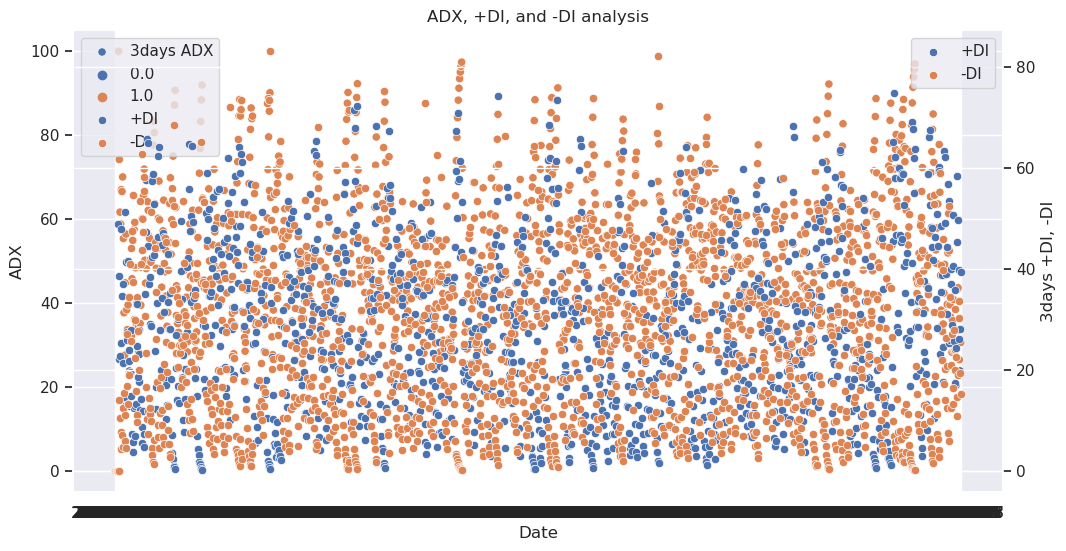

In [14]:
fig,ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x="Date",y="3_adx",label="3days ADX",ax=ax,data=all_features,hue="3_ADX_Buy_Sell_Signal")

ax2 = ax.twinx()
# sns.lineplot(x="Date",y="3_adx",data=all_features,color="orange",ax=ax2)
sns.scatterplot(x="Date",y="3_pos_di",data=all_features,label="+DI",ax=ax2)
sns.scatterplot(x="Date",y="3_neg_di",data=all_features,label="-DI",ax=ax2)
sns.color_palette("bright")

# Add labels
ax.set_xlabel("Date")
ax.set_ylabel("ADX")
ax2.set_ylabel("3days +DI, -DI")
ax.set_title("ADX, +DI, and -DI analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1+labels2, loc="upper left")

plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

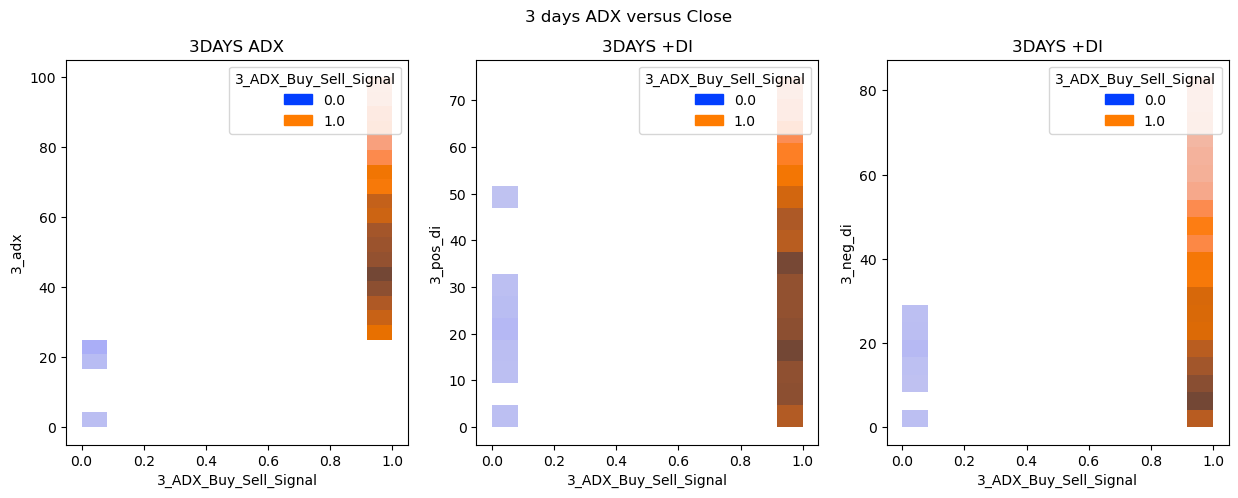

In [27]:
fig,ax = plt.subplots(1, 3, figsize=(15, 5))
sns.color_palette("bright")
fig.suptitle('3 days ADX versus Close')

sns.histplot(ax=ax[0],data=all_features,x="3_ADX_Buy_Sell_Signal",y="3_adx",palette="bright",legend=True,kde=True,hue="3_ADX_Buy_Sell_Signal")
ax[0].set_title("3DAYS ADX")

sns.histplot(ax=ax[1],data=all_features,x="3_ADX_Buy_Sell_Signal",y="3_pos_di",palette="bright",legend=True,kde=True,hue="3_ADX_Buy_Sell_Signal")
ax[1].set_title("3DAYS +DI")

sns.histplot(ax=ax[2],data=all_features,x="3_ADX_Buy_Sell_Signal",y="3_neg_di",palette="bright",legend=True,kde=True,hue="3_ADX_Buy_Sell_Signal")
ax[2].set_title("3DAYS +DI")

plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/relational.py:858: UserWarning: relplot is a figure-level function and does not accept the `ax` parameter. You may wish to try lineplot
  warnings.warn(msg, UserWar

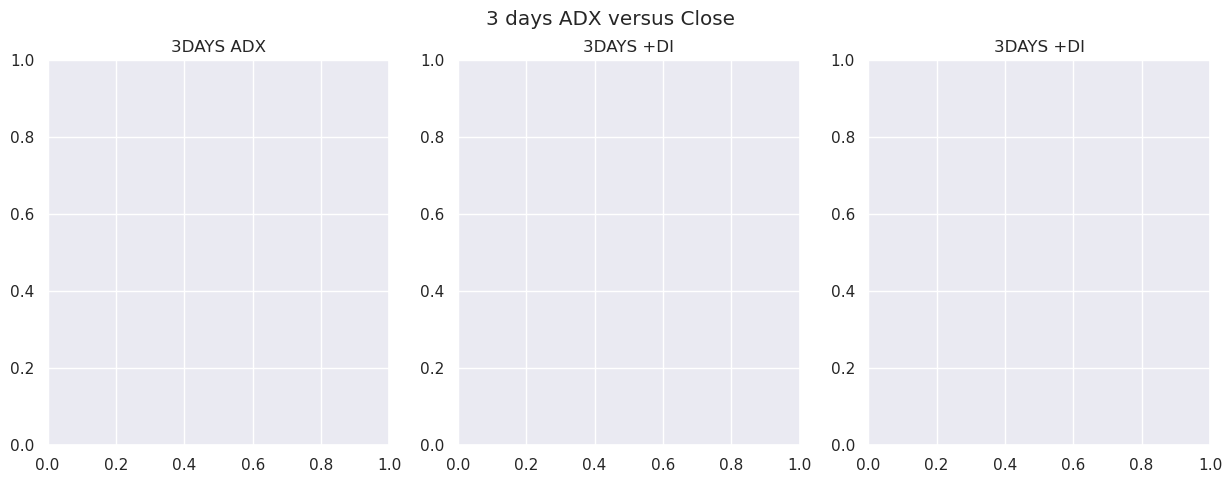

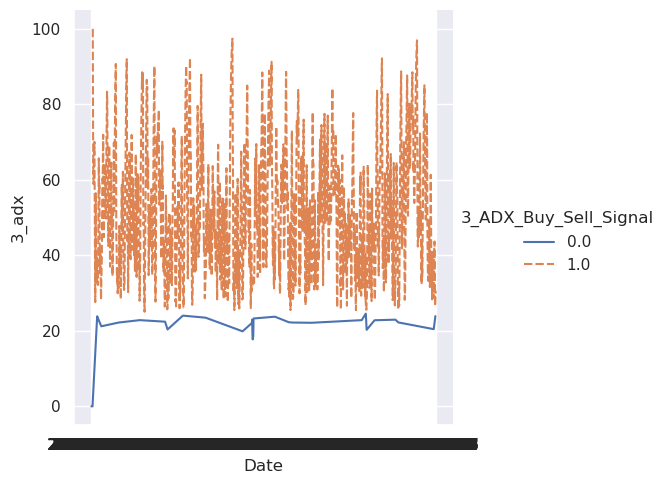

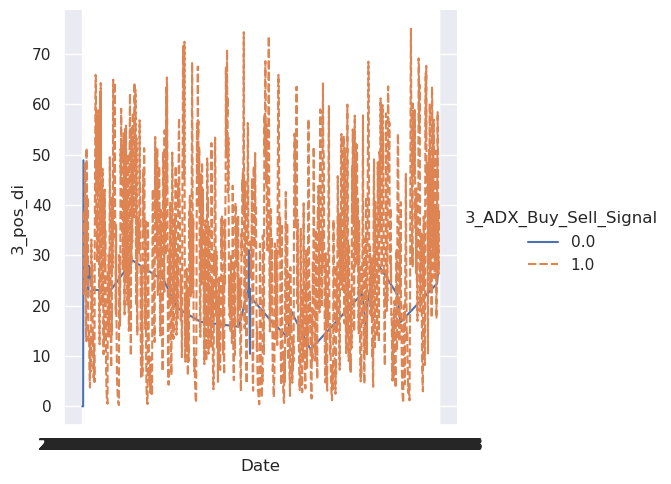

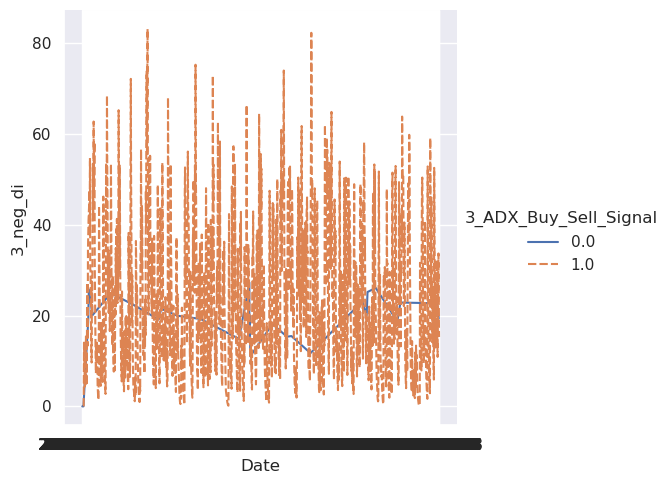

In [17]:
fig,ax = plt.subplots(1, 3, figsize=(15, 5))
sns.color_palette("bright")
fig.suptitle('3 days ADX versus Close')

sns.relplot(ax=ax[0],data=all_features,x="Date",hue="3_ADX_Buy_Sell_Signal",y="3_adx",kind="line",style="3_ADX_Buy_Sell_Signal")
ax[0].set_title("3DAYS ADX")

sns.relplot(ax=ax[1],data=all_features,x="Date",hue="3_ADX_Buy_Sell_Signal",y="3_pos_di",kind="line",style="3_ADX_Buy_Sell_Signal")
ax[1].set_title("3DAYS +DI")

sns.relplot(ax=ax[2],data=all_features,x="Date",hue="3_ADX_Buy_Sell_Signal",y="3_neg_di",kind="line",style="3_ADX_Buy_Sell_Signal")
ax[2].set_title("3DAYS +DI")


plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

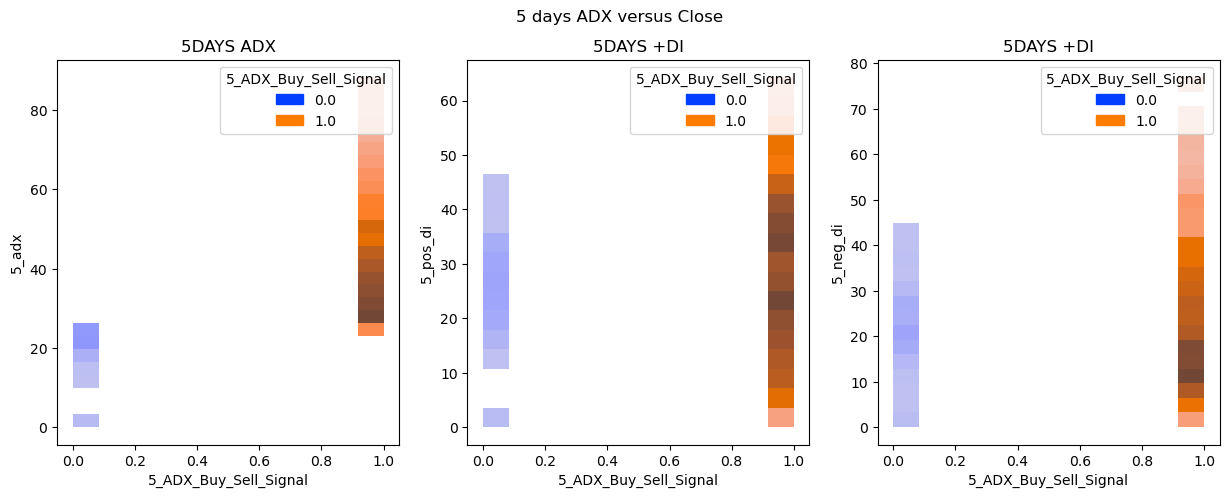

In [32]:
fig,ax = plt.subplots(1, 3, figsize=(15, 5))
sns.color_palette("bright")
fig.suptitle('5 days ADX versus Close')

sns.histplot(ax=ax[0],data=all_features,stat="percent",x="5_ADX_Buy_Sell_Signal",y="5_adx",palette="bright",legend=True,kde=True,hue="5_ADX_Buy_Sell_Signal")
ax[0].set_title("5DAYS ADX")

sns.histplot(ax=ax[1],data=all_features,x="5_ADX_Buy_Sell_Signal",y="5_pos_di",stat="percent",palette="bright",legend=True,kde=True,hue="5_ADX_Buy_Sell_Signal")
ax[1].set_title("5DAYS +DI")

sns.histplot(ax=ax[2],data=all_features,x="5_ADX_Buy_Sell_Signal",y="5_neg_di",palette="bright",legend=True,kde=True,hue="5_ADX_Buy_Sell_Signal")
ax[2].set_title("5DAYS +DI")

plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


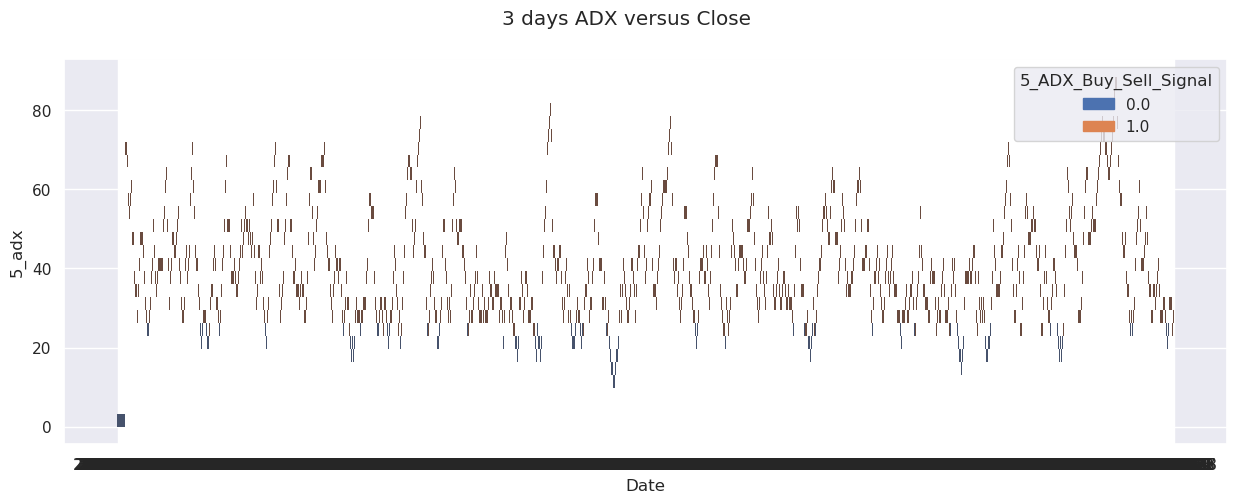

In [15]:
fig,ax = plt.subplots(1, 1, figsize=(15, 5))
sns.color_palette("bright")
fig.suptitle('3 days ADX versus Close')

sns.histplot(data=all_features,x="Date",y="5_adx",kde=True,ax=ax,stat="percent",hue="5_ADX_Buy_Sell_Signal",element="poly")
plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

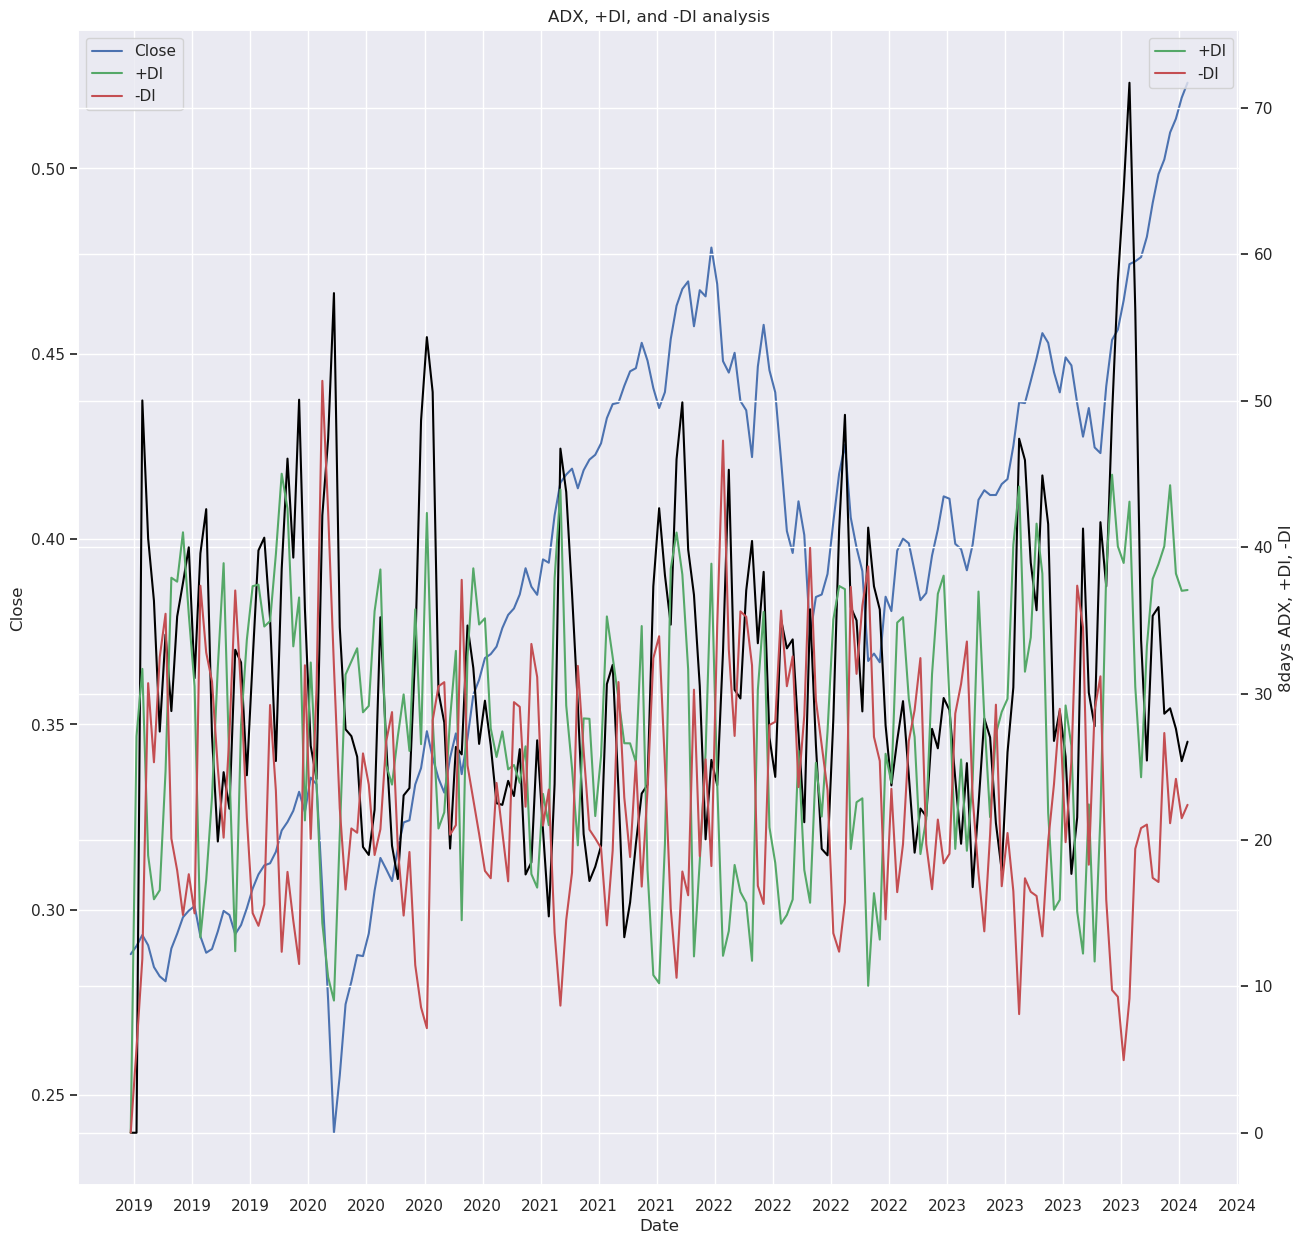

In [43]:
# all_features["Close"] = all_features["Close"]*(10**4)
data = all_features.resample("20D").mean()
fig,ax = plt.subplots(figsize=(15,15))
# x = np.linspace(0,len(all_features["Date"])-1,len(all_features["Date"]))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
sns.lineplot(x=data.index,y="Close",label="Close",ax=ax,data=data,color="b")

ax2 = ax.twinx()
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=100))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
sns.lineplot(x=data.index,y="8_adx",data=data,color="black",ax=ax2)
sns.lineplot(x=data.index,y="8_pos_di",data=data,label="+DI",color="g",ax=ax2)
sns.lineplot(x=data.index,y="8_neg_di",data=data,label="-DI",color="r",ax=ax2)

# ax2.set_ylim(0,100)
# ax.set_ylim(1.0,6.0)
# ax2.set_yticks(np.linspace(0,100,20))
# ax2.tick_params(axis="y",which="major",length=10,width=2)
# Add labels
ax.set_xlabel("Date")
ax.set_ylabel("Close")
ax2.set_ylabel("8days ADX, +DI, -DI")
ax.set_title("ADX, +DI, and -DI analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1+labels2, loc="upper left")

plt.show()

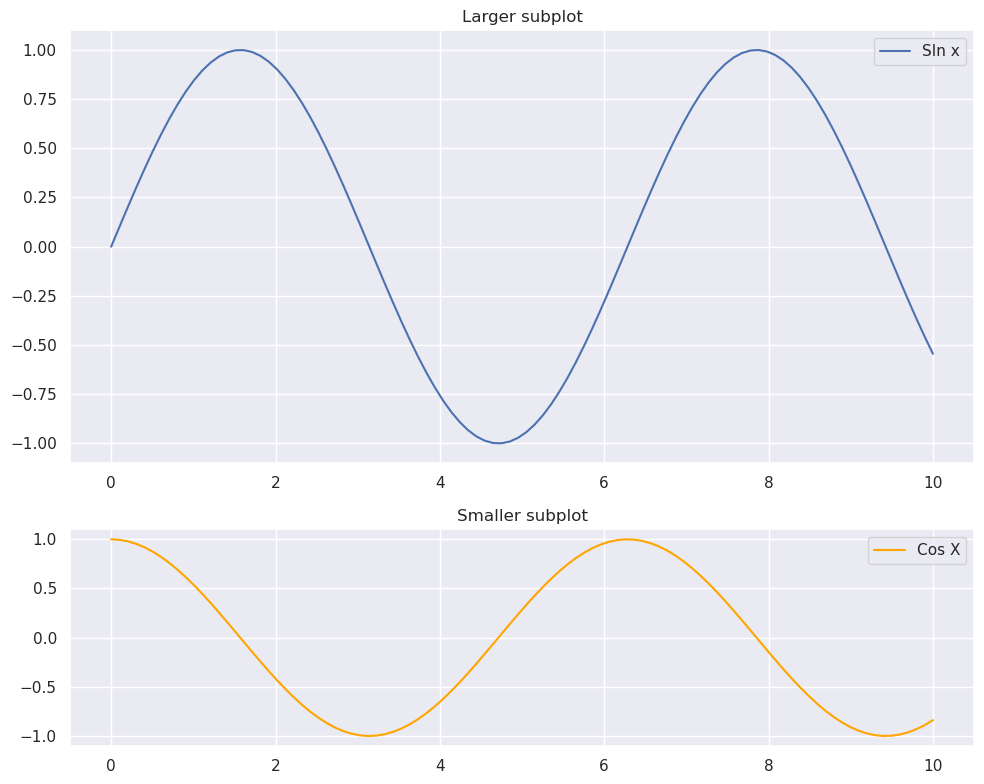

In [47]:
x = np.linspace(0,10,100)
y1= np.sin(x)
y2 = np.cos(x)

fig = plt.figure(figsize=(10,8))
gs=gridspec.GridSpec(2,1,height_ratios=[2,1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax1.plot(x,y1,label="SIn x")
ax1.set_title("Larger subplot")
ax1.legend()
ax1.grid(True)

ax2.set_title("Smaller subplot")
ax2.plot(x,y2,label="Cos X",color="orange")
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

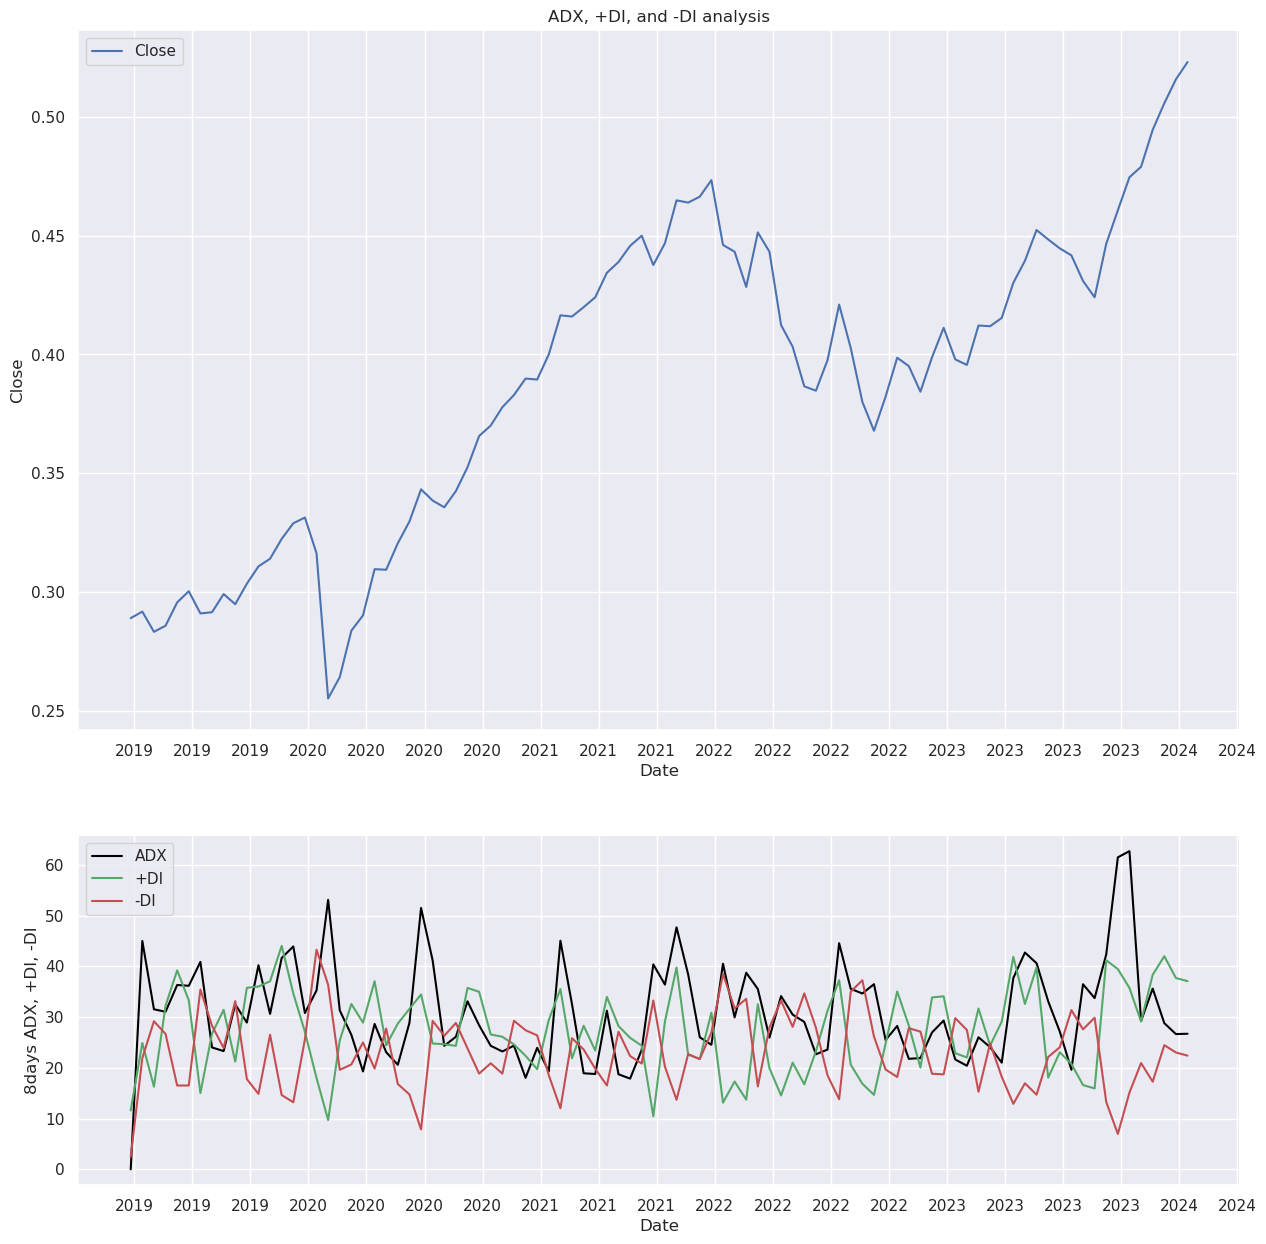

In [49]:
data = all_features.resample("20D").mean()
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1,height_ratios=[2,1])

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# fig,ax = plt.subplots(figsize=(15,15))
# x = np.linspace(0,len(all_features["Date"])-1,len(all_features["Date"]))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
# ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
sns.lineplot(x=data.index,y="Close",label="Close",ax=ax,data=data,color="b")

ax2.xaxis.set_major_locator(mdates.DayLocator(interval=100))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
sns.lineplot(x=data.index,y="8_adx",data=data,color="black",ax=ax2,label="ADX")
sns.lineplot(x=data.index,y="8_pos_di",data=data,label="+DI",color="g",ax=ax2)
sns.lineplot(x=data.index,y="8_neg_di",data=data,label="-DI",color="r",ax=ax2)

# ax2.set_ylim(0,100)
# ax.set_ylim(1.0,6.0)
# ax2.set_yticks(np.linspace(0,100,20))
# ax2.tick_params(axis="y",which="major",length=10,width=2)
# Add labels
ax2.set_xlabel("Date")
ax.set_ylabel("Close")
ax2.set_ylabel("8days ADX, +DI, -DI")
ax.set_title("ADX, +DI, and -DI analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1, labels1, loc="upper left")
ax2.legend( lines2, labels2, loc="upper left")

plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

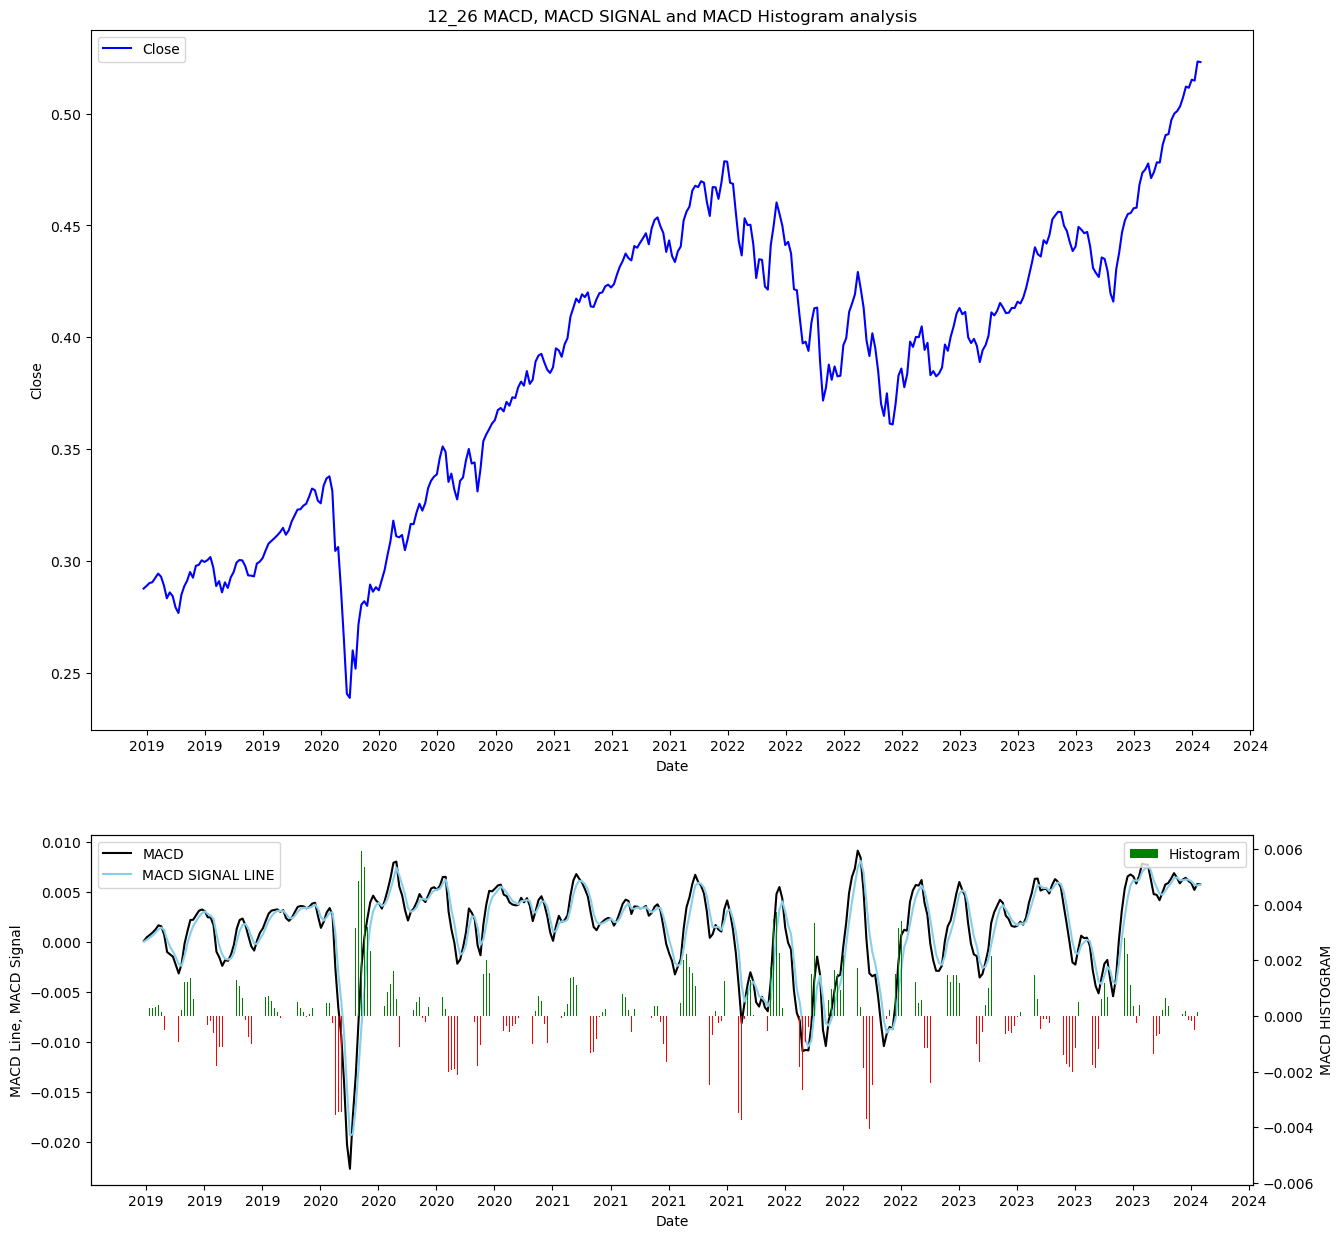

In [15]:
data = all_features[["Close","MACD_12_26","MACD_Signal_12_26","MACD_diff_12_26"]].resample("5D").mean()
data["MACD_UP_DOWN"] = all_features["MACD_UP_DOWN"]
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1,height_ratios=[2,1])

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = ax2.twinx()
sns.color_palette("mako", as_cmap=True)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
sns.lineplot(x=data.index,y="Close",label="Close",ax=ax,data=data,color="b")
colors = ["g" if v > 0 else "r" for v in data["MACD_diff_12_26"]]

ax2.xaxis.set_major_locator(mdates.DayLocator(interval=100))
sns.lineplot(x=data.index,y="MACD_12_26",data=data,color="black",ax=ax2,label="MACD")
sns.lineplot(x=data.index,y="MACD_Signal_12_26",data=data,label="MACD SIGNAL LINE",color="skyblue",ax=ax2)
ax3.bar(data.index, data["MACD_diff_12_26"],label="Histogram",color=colors,width=1.0)

ax2.set_xlabel("Date")
ax.set_ylabel("Close")
ax2.set_ylabel("MACD Line, MACD Signal")
ax3.set_ylabel("MACD HISTOGRAM")
ax.set_title("12_26 MACD, MACD SIGNAL and MACD Histogram analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax.legend(lines1, labels1, loc="upper left")
ax2.legend( lines2, labels2, loc="upper left")
ax3.legend(lines3,labels3,loc="upper right")

plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

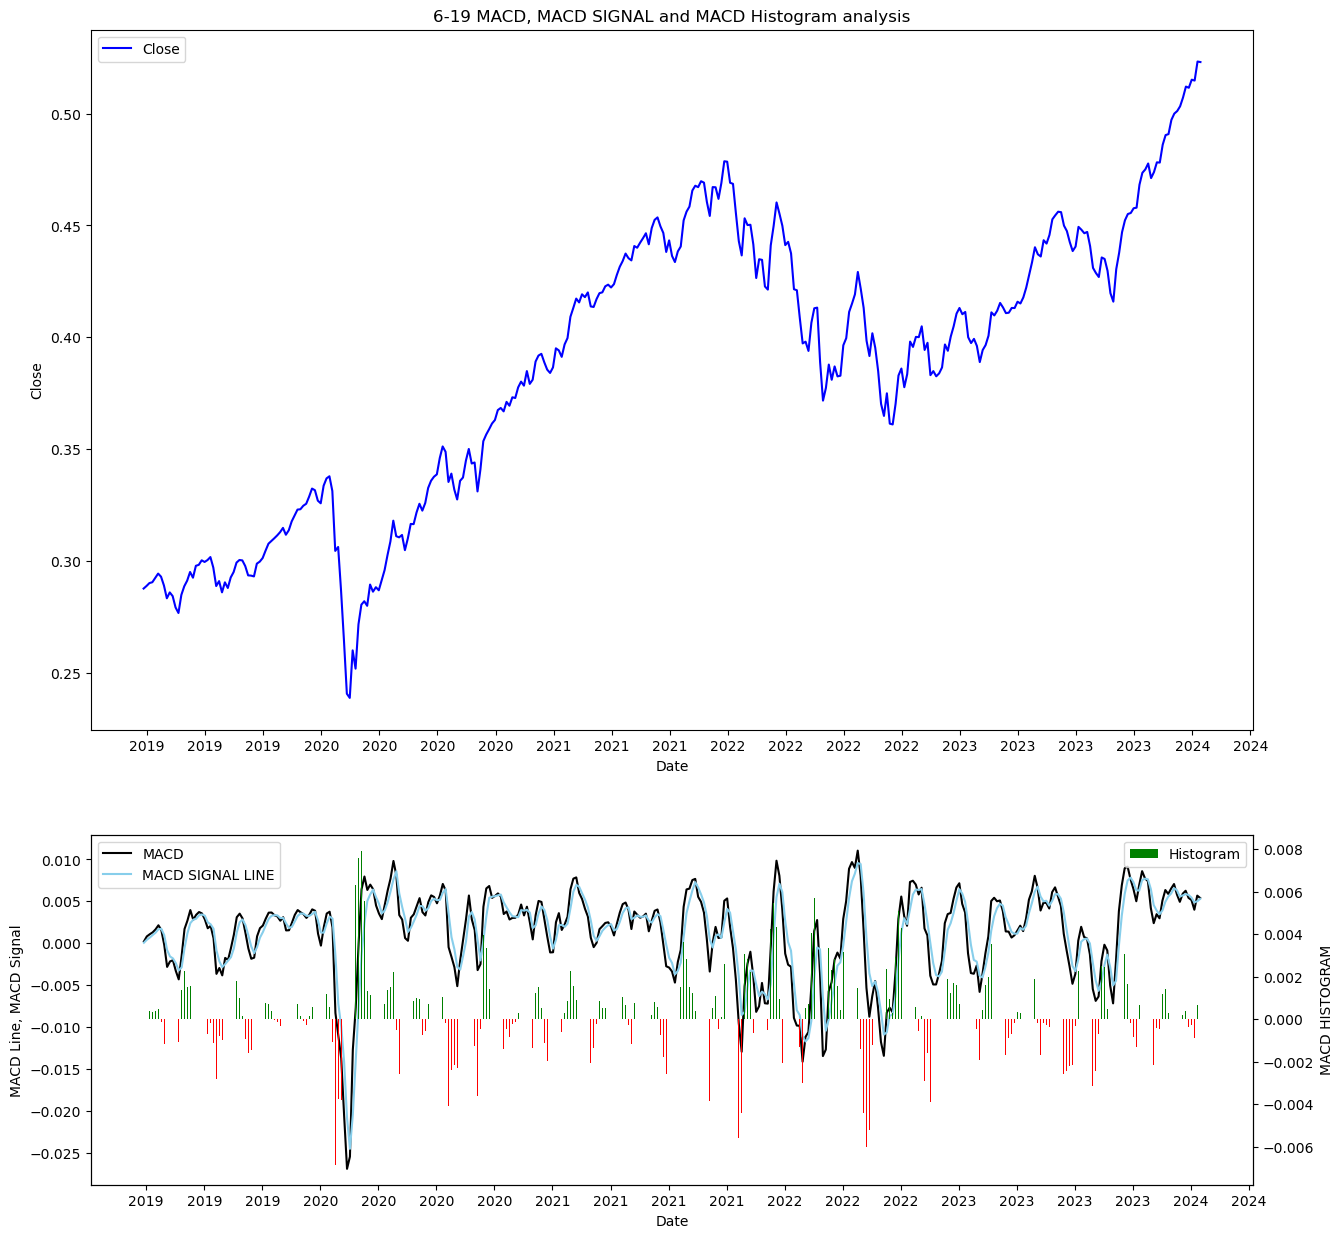

In [18]:
data = all_features[["Close","MACD_6_19","MACD_Signal_6_19","MACD_Diff"]].resample("5D").mean()
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1,height_ratios=[2,1])

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = ax2.twinx()
sns.color_palette("mako", as_cmap=True)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=100))
sns.lineplot(x=data.index,y="Close",label="Close",ax=ax,data=data,color="b")
colors = ["g" if v > 0 else "r" for v in data["MACD_Diff"]]

ax2.xaxis.set_major_locator(mdates.DayLocator(interval=100))
sns.lineplot(x=data.index,y="MACD_6_19",data=data,color="black",ax=ax2,label="MACD")
sns.lineplot(x=data.index,y="MACD_Signal_6_19",data=data,label="MACD SIGNAL LINE",color="skyblue",ax=ax2)
ax3.bar(data.index, data["MACD_Diff"],label="Histogram",color=colors,width=1.0)

ax2.set_xlabel("Date")
ax.set_ylabel("Close")
ax2.set_ylabel("MACD Line, MACD Signal")
ax3.set_ylabel("MACD HISTOGRAM")
ax.set_title("6-19 MACD, MACD SIGNAL and MACD Histogram analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax.legend(lines1, labels1, loc="upper left")
ax2.legend( lines2, labels2, loc="upper left")
ax3.legend(lines3,labels3,loc="upper right")

plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

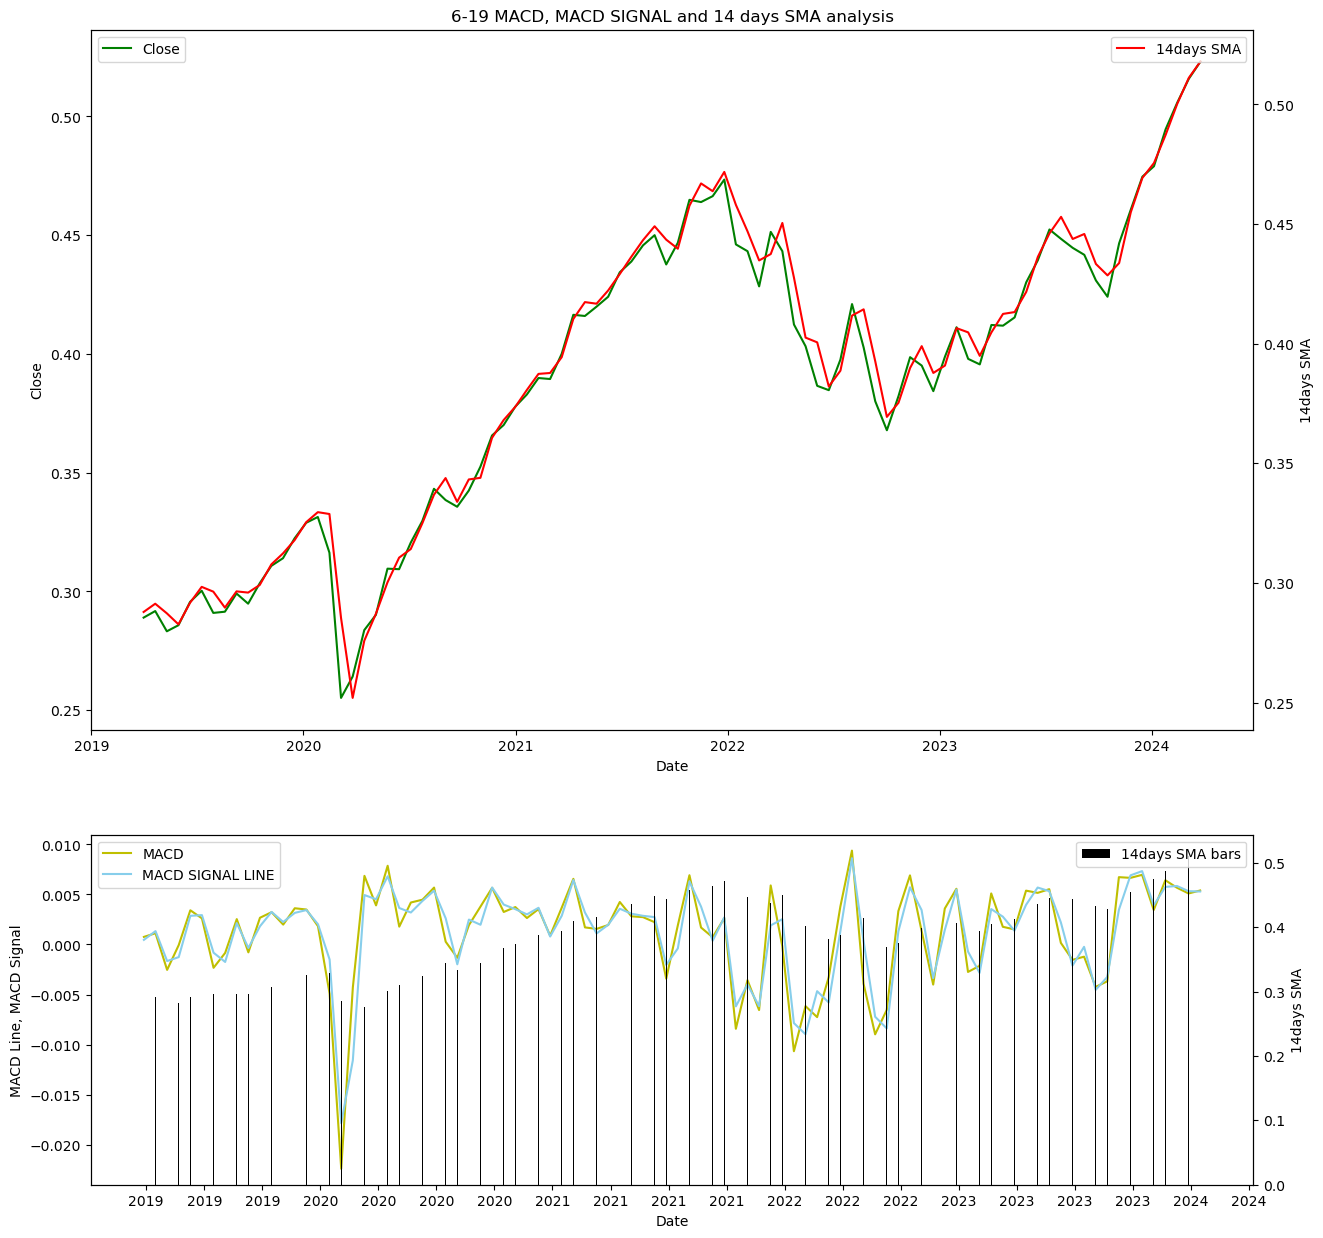

In [44]:
# MACD AND SMA analysis
data = all_features[["Close","MACD_6_19","MACD_Signal_6_19","MACD_Diff","14_sma"]].resample("20D").mean()
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1,height_ratios=[2,1])

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = ax.twinx()
ax4 = ax2.twinx()
sns.color_palette("mako", as_cmap=True)

sns.lineplot(x=data.index,y="Close",label="Close",ax=ax,data=data,color="g")
sns.lineplot(x=data.index,y="14_sma",label="14days SMA",ax=ax3,data=data,color="r")
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=100))
sns.lineplot(x=data.index,y="MACD_6_19",data=data,color="y",ax=ax2,label="MACD")
sns.lineplot(x=data.index,y="MACD_Signal_6_19",data=data,label="MACD SIGNAL LINE",color="skyblue",ax=ax2)
ax4.bar(data.index, data["14_sma"],label="14days SMA bars",color="black", width=1.0)

ax2.set_xlabel("Date")
ax.set_ylabel("Close")
ax2.set_ylabel("MACD Line, MACD Signal")
ax3.set_ylabel("14days SMA")
ax4.set_ylabel("14days SMA")
ax.set_title("6-19 MACD, MACD SIGNAL and 14 days SMA analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax.legend(lines1, labels1, loc="upper left")
ax2.legend( lines2, labels2, loc="upper left")
ax3.legend(lines3,labels3,loc="upper right")
ax4.legend(lines4, labels4,loc="upper right")
plt.show()

/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/chief/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

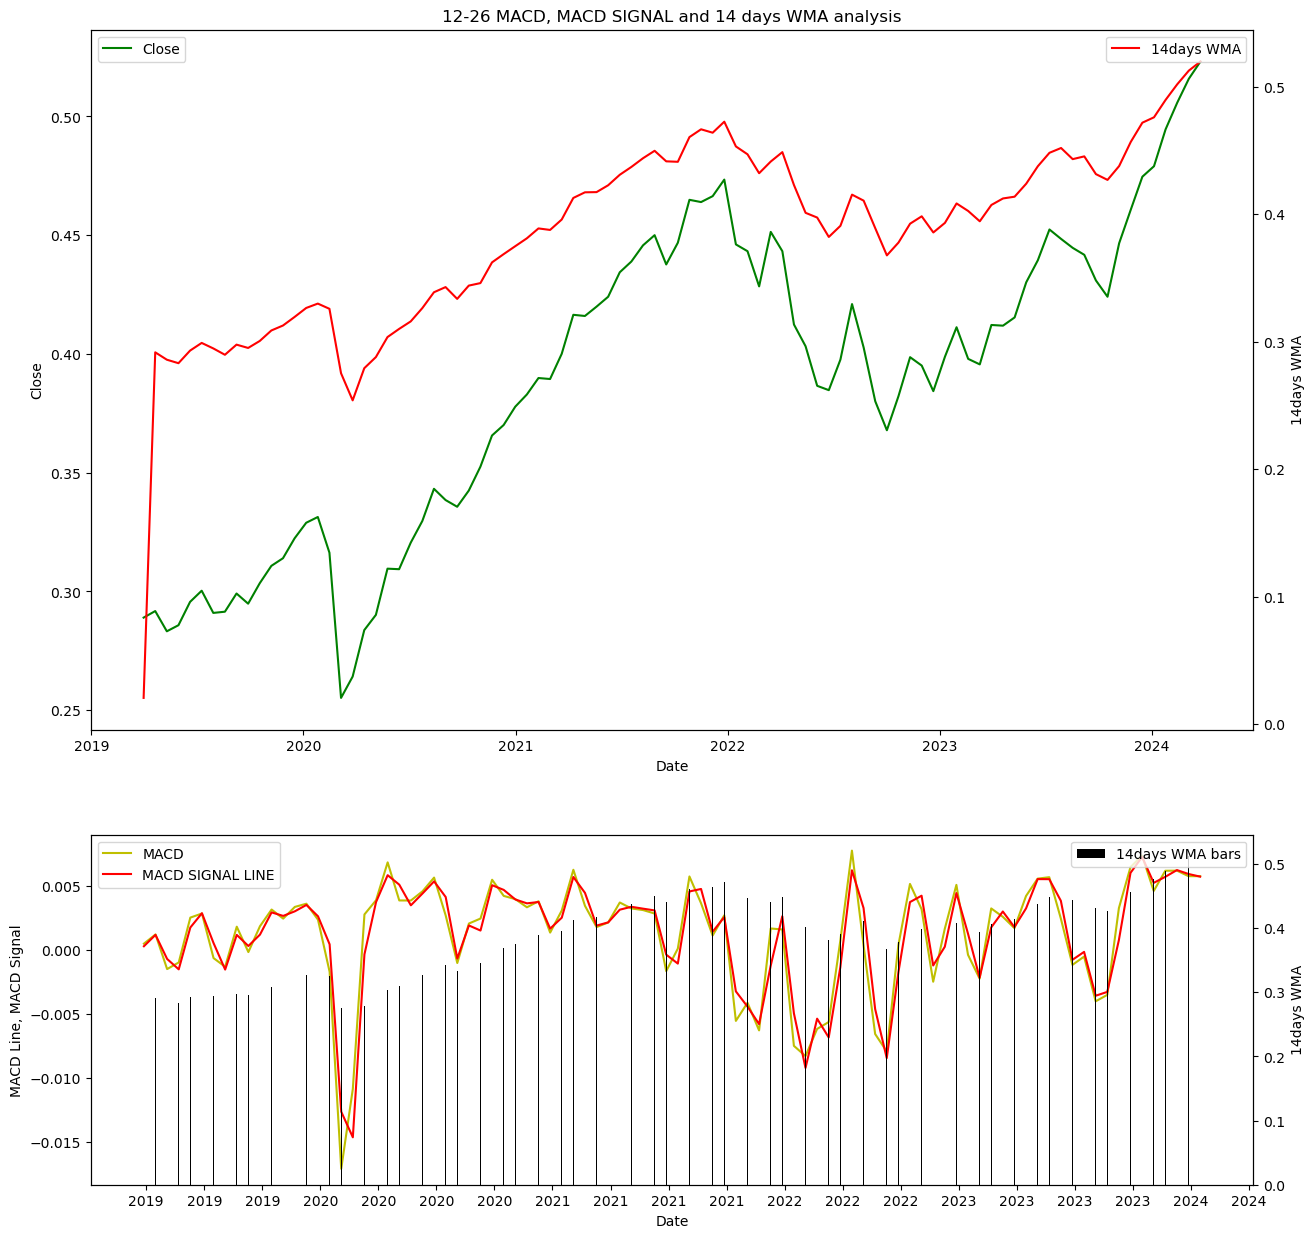

In [47]:
data = all_features[["Close","MACD_12_26","MACD_Signal_12_26","14_wma"]].resample("20D").mean()
fig = plt.figure(figsize=(15,15))
gs=gridspec.GridSpec(2,1,height_ratios=[2,1])

ax = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = ax.twinx()
ax4 = ax2.twinx()
sns.color_palette("mako", as_cmap=True)

sns.lineplot(x=data.index,y="Close",label="Close",ax=ax,data=data,color="g")
sns.lineplot(x=data.index,y="14_wma",label="14days WMA",ax=ax3,data=data,color="r")
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=100))
sns.lineplot(x=data.index,y="MACD_12_26",data=data,color="y",ax=ax2,label="MACD")
sns.lineplot(x=data.index,y="MACD_Signal_12_26",data=data,label="MACD SIGNAL LINE",color="r",ax=ax2)
ax4.bar(data.index, data["14_wma"],label="14days WMA bars",color="black",width=1.0)

ax2.set_xlabel("Date")
ax.set_ylabel("Close")
ax2.set_ylabel("MACD Line, MACD Signal")
ax3.set_ylabel("14days WMA")
ax4.set_ylabel("14days WMA")
ax.set_title("12-26 MACD, MACD SIGNAL and 14 days WMA analysis")

# Add legend
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
lines4, labels4 = ax4.get_legend_handles_labels()
ax.legend(lines1, labels1, loc="upper left")
ax2.legend( lines2, labels2, loc="upper left")
ax3.legend(lines3,labels3,loc="upper right")
ax4.legend(lines4, labels4,loc="upper right")

plt.show()